<a href="https://colab.research.google.com/github/lc20140856-stack/Analisis-y-visualizacion-de-datos/blob/main/19_feb_regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#install.packages("ISLR2")
install.packages("ggplot2")
install.packages("readr")

# Cargar librerías necesarias
#library(ISLR2)
library(ggplot2)
library(readr)
# Cargar datos de publicidad
#data(Advertising) # Variables: TV, Radio, Newspaper, Sales
#data(Credit)
Advertising<- read.csv("Advertising.csv")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
# Ajustar modelo de regresión lineal simple
# Predecir ventas en función del presupuesto de TV
modelo_simple <- lm(Sales ~ TV, data = Advertising)
# Ver resumen completo del modelo
summary(modelo_simple)


Call:
lm(formula = Sales ~ TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


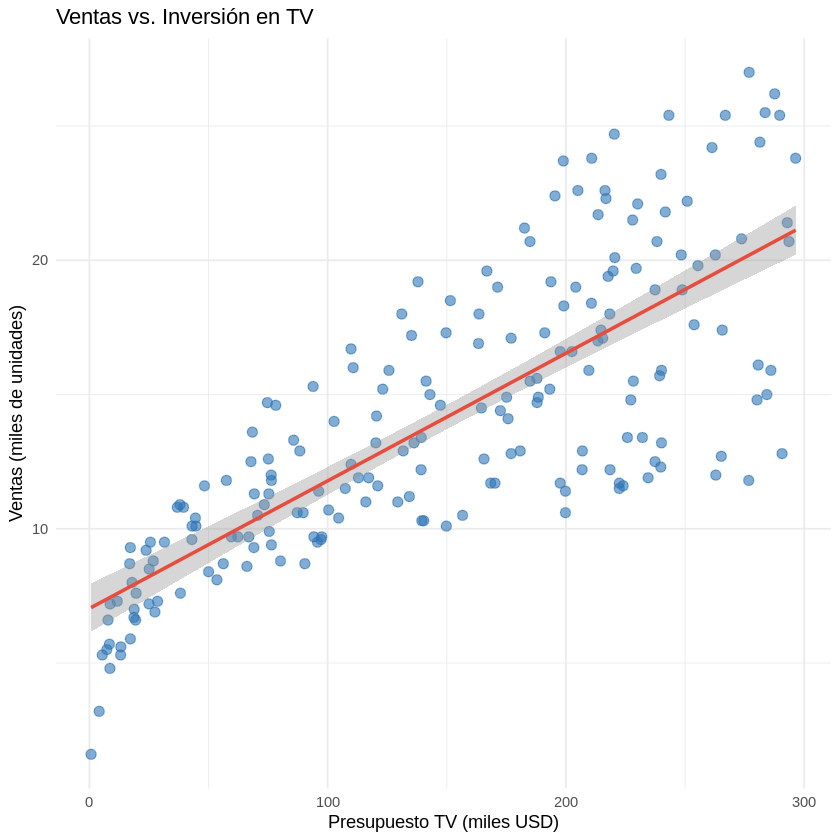

In [13]:
# Visualizar la recta de regresión
ggplot(Advertising, aes(x = TV, y = Sales)) + geom_point(color = '#2E75B6', alpha = 0.6, size = 2.5) + geom_smooth(method = 'lm', color = '#E74C3C', se = TRUE) + labs(title = 'Ventas vs. Inversión en TV', x = 'Presupuesto TV (miles USD)', y = 'Ventas (miles de unidades)') + theme_minimal()

In [14]:
# Modelo de regresión múltiple
modelo_mult <- lm(Sales ~ TV + Radio + Newspaper, Advertising)
summary(modelo_mult)
# Resultado esperado (aproximado):
# Coefficients: Estimate Std. Error t value Pr(&gt;|t|)
# (Intercept) 2.9389 0.3119 9.422 &lt;2e-16 ***
# TV 0.0458 0.0014 32.809 &lt;2e-16 ***
# radio 0.1885 0.0086 21.893 &lt;2e-16 ***
# newspaper -0.0010 0.0059 -0.177 0.860
# ---
# Multiple R-squared: 0.8972, Adjusted R-squared: 0.8956
# Predicción para nuevos datos
nuevos_datos <- data.frame(TV = 150, Radio = 25, Newspaper = 30)
predict(modelo_mult, newdata = nuevos_datos, interval = 'prediction', level = 0.95)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,fit,lwr,upr
1,14.48571,11.15318,17.81824


In [15]:
# Ejemplo con variable categórica: ShelveLoc (Good/Bad/Medium)
Carseats<- read.csv("Carseats.csv")


In [16]:
modelo_carseat <- lm(Sales ~ Price + ShelveLoc + Age + Income, data = Carseats)
summary(modelo_carseat)



Call:
lm(formula = Sales ~ Price + ShelveLoc + Age + Income, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5189 -1.1368 -0.1204  1.2244  5.1830 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     13.787882   0.597134  23.090  < 2e-16 ***
Price           -0.059220   0.003604 -16.430  < 2e-16 ***
ShelveLocGood    4.997441   0.252486  19.793  < 2e-16 ***
ShelveLocMedium  2.044343   0.207854   9.835  < 2e-16 ***
Age             -0.049810   0.005262  -9.466  < 2e-16 ***
Income           0.015155   0.003037   4.990 9.09e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.691 on 394 degrees of freedom
Multiple R-squared:  0.646,	Adjusted R-squared:  0.6415 
F-statistic: 143.8 on 5 and 394 DF,  p-value: < 2.2e-16


In [17]:
# R crea automáticamente:
# ShelveLocGood → 1 si ubicación es &#39;Good&#39;, 0 si no
# ShelveLocMedium → 1 si ubicación es &#39;Medium&#39;, 0 si no
# (Bad es la categoría de referencia)
# Verificar qué contraste usa R
contrasts(as.factor(Carseats$ShelveLoc))

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


In [18]:
# Interacción entre TV y radio
# El efecto de TV puede amplificarse cuando radio también es alto
modelo_interact <- lm(Sales ~ TV * Radio, data = Advertising)
summary(modelo_interact)
# Equivalente a:
# lm(sales ~ TV + radio + TV:radio, data = Advertising)
# Modelo con transformación logarítmica y cuadrática
modelo_poly <- lm(Sales ~ TV + I(TV^2) + Radio, data = Advertising)
summary(modelo_poly)


Call:
lm(formula = Sales ~ TV * Radio, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
Radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV:Radio    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16



Call:
lm(formula = Sales ~ TV + I(TV^2) + Radio, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3860 -0.8822 -0.0498  0.9613  3.5725 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.288e+00  3.588e-01   3.588 0.000421 ***
TV           7.844e-02  4.985e-03  15.736  < 2e-16 ***
I(TV^2)     -1.136e-04  1.677e-05  -6.775 1.42e-10 ***
Radio        1.930e-01  7.293e-03  26.465  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.517 on 196 degrees of freedom
Multiple R-squared:  0.9167,	Adjusted R-squared:  0.9154 
F-statistic:   719 on 3 and 196 DF,  p-value: < 2.2e-16


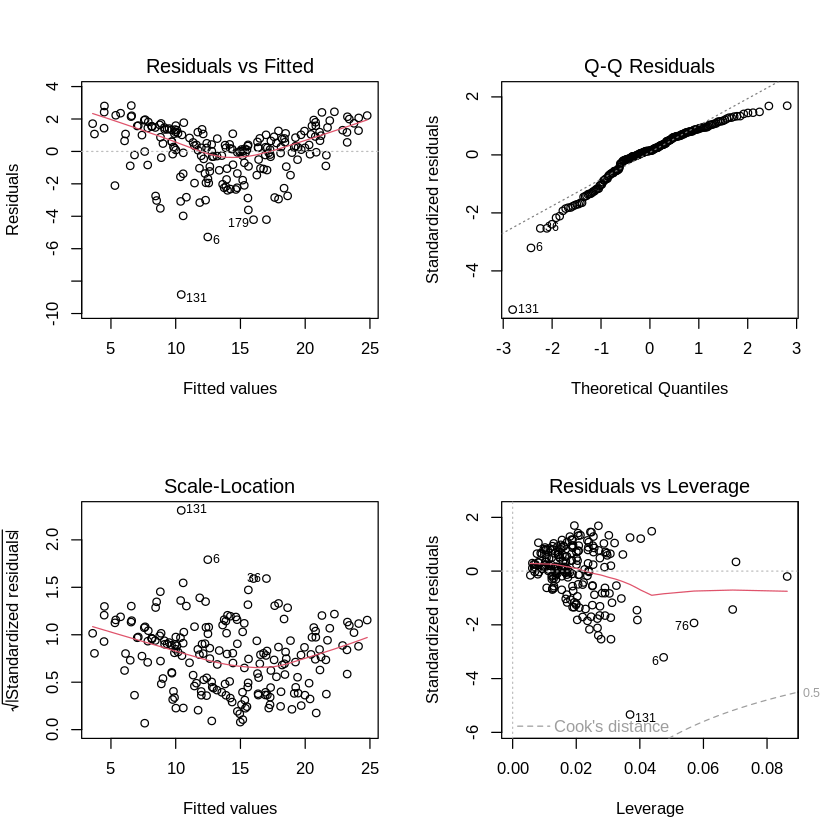

In [19]:
# Gráficos de diagnóstico completos
par(mfrow = c(2, 2)) # Layout 2x2
plot(modelo_mult) # 4 gráficos automáticos
# Gráfico 1 - Residuals vs Fitted: detecta no linealidad
# Gráfico 2 - Q-Q Plot: evalúa normalidad de residuos
# Gráfico 3 - Scale-Location: evalúa homocedasticidad
# Gráfico 4 - Residuals vs Leverage: detecta puntos influyentes


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  modelo_mult
BP = 5.1329, df = 3, p-value = 0.1623


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘fracdiff’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData



TV     Radio Newspaper 
 1.004611  1.144952  1.145187

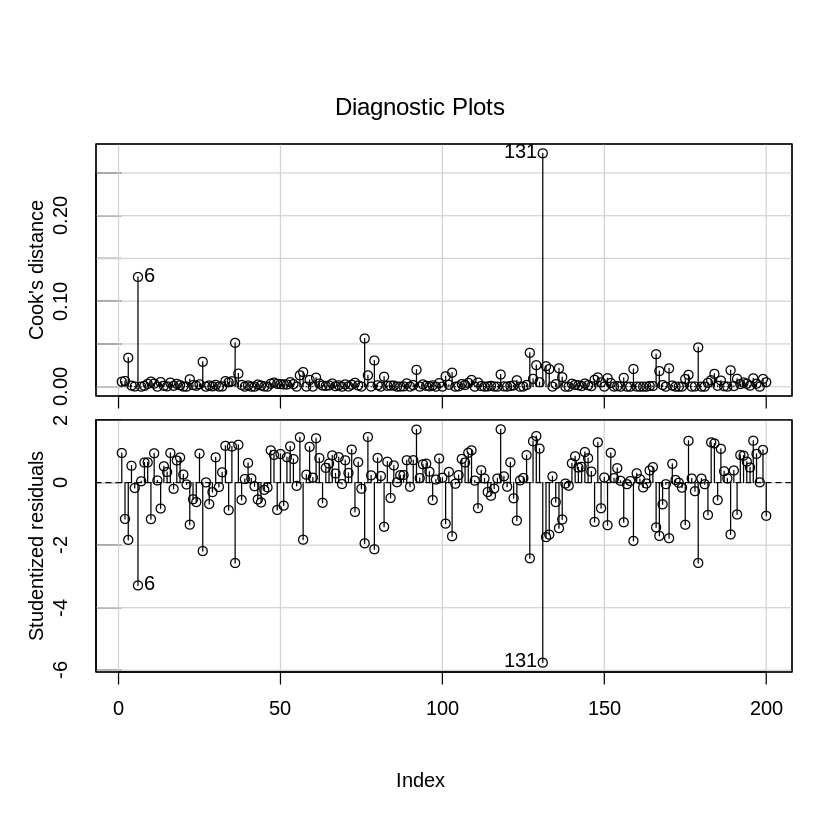

In [10]:
# ── Prueba formal de homocedasticidad ──
install.packages("lmtest")
library(lmtest)
bptest(modelo_mult) # Breusch-Pagan: H0 = homocedasticidad
# ── Multicolinealidad ──
install.packages("car")
library(car)
vif(modelo_mult) # VIF &lt; 5 = aceptable, &gt;10 = problema severo
# ── Observaciones influyentes ──
influenceIndexPlot(modelo_mult, vars = c('Cook', 'Studentized'))
# Distancia de Cook &gt; 1 sugiere observación muy influyente